In [142]:
from math import *
import numpy as np,sys,cv2
from skimage import io
from scipy import ndimage
from matplotlib import pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from imageio import imread

## Loading the image

In [143]:
img = imread('/content/Test3.jpeg')

In [144]:
# A function to add random noise to our image
def add_noise_to_image(image):
  ''' Considering only the gaussian noise filtering but we can choose different noise by changing the mode'''
  noise_image = random_noise(image, mode='s&p', amount=0.15,seed=42)
  return noise_image

In [145]:
# A function to check the Peak Signal Ratio
def psnr(orgImg, nosiyImage): 
	mse = np.mean((orgImg - nosiyImage) ** 2) 
	if(mse == 0):return 100
	maximum_pixel_can_be_used = 255.0 # This number can be cahnged according to our wish
	ratio = 20 * log10(maximum_pixel_can_be_used / sqrt(mse)) 
	return ratio

In [146]:
def rgbToBlack(image):
  image_copy = image
  height, width, channels = image.shape
  for i in range(height):
    for j in range(width):
        image_copy[i,j] = 0.3 * img[i,j][0] + 0.59 * img[i,j][1] +  0.11 * img[i,j][2]
  return image_copy

In [147]:
# Image conversion
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noisy_img = add_noise_to_image(grayImg)

## Image analysis

Type of the given image is <class 'imageio.core.util.Array'>
Size of given image is (400, 400, 3)
Height of given image is 400
Width of given image is 400
Diemension of the given image is 3
PSNR value is: 2.7957854775047997 dB


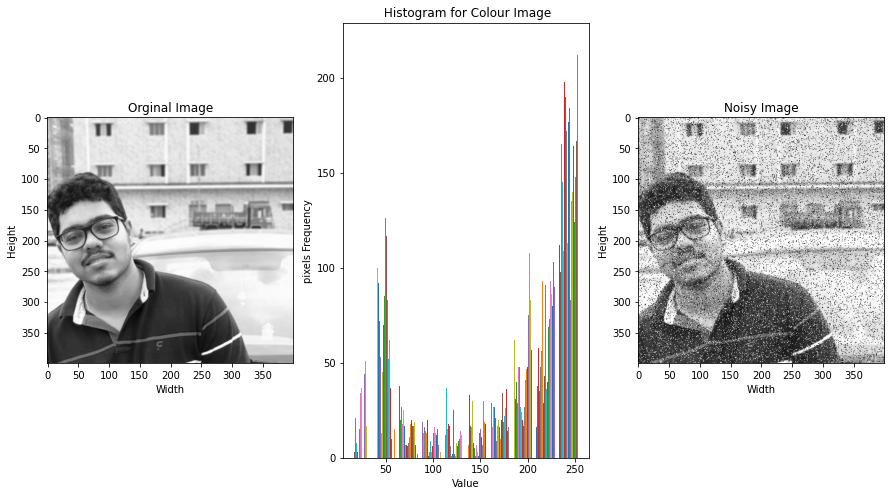

In [148]:
print(f'Type of the given image is {type(img)}')
print(f'Size of given image is {img.shape}')
print(f'Height of given image is {img.shape[0]}')
print(f'Width of given image is {img.shape[1]}')
print(f'Diemension of the given image is {img.ndim}')
print(f'PSNR value is: {psnr(img, add_noise_to_image(img))} dB')

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))

# to plot the image
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
axes[0].set_title('Orginal Image')
axes[0].imshow(grayImg,cmap='gray')

# hist function is used to plot the histogram of an image.
axes[1].set_xlabel("Value")
axes[1].set_ylabel("pixels Frequency")
axes[1].set_title(" Histogram for Colour Image")
axes[1].hist(img[:,:,0]) # Using the image slicing to convert the 3D image to 2D image for the sake of plotting

# to plot the noisy image
axes[2].set_xlabel('Width')
axes[2].set_ylabel('Height')
axes[2].set_title('Noisy Image')
axes[2].imshow(noisy_img,cmap='gray')

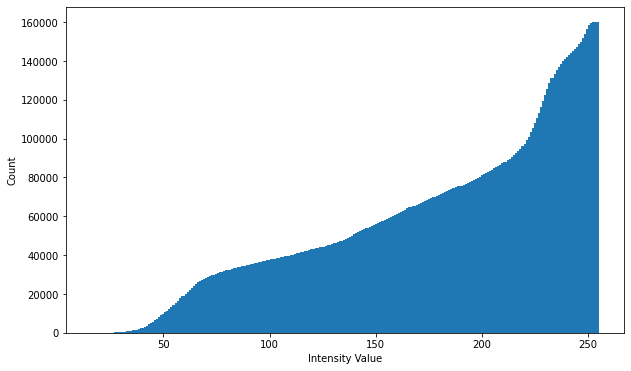

In [149]:
# Intensity of an image
plt.figure(figsize=(10,6))
_ = plt.hist(grayImg.ravel(), bins = 250, cumulative = True)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')

## From the above graph we can conclude that intensity of the image is 255

In [150]:
var = np.var(grayImg)
print(f'Variance of black and white image is {var}')

Variance of black and white image is 4941.015648684023


## Bilateral Filtering
A pixel-based approach to bilateral filtering. The de-noised counterpart is achieved with the weighted average of its neighbors in a particular pixel, when weights are determined by certain functions dependent upon the similarity of their color and intensity and the distance between the given pixel and the neighbor pixel.

In [157]:
I = np.lib.pad(noisy_img, 1, 'mean') # Calculating the mean value of each pixel
bilateral_iamge = np.copy(data) # Making a copy data of image

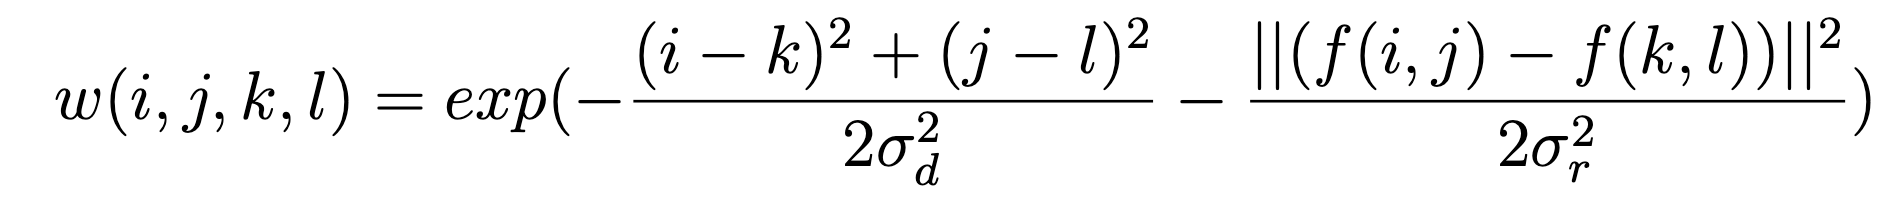

# The formula for calculating the weights.
## These weights are obtained from the range and domain filtering based on the $σ_{r}$ and $σ_{d}$ values.

In [165]:
def bilateral_filter(i,j,d,I,sigma_d,sigma_r):
    arr,sum_num,sum_den=[],0,0

    # Asigning the distance value for each neighbourhood pixel
    def distance(i, j):
      return np.absolute(i-j) # returns the absolute position of each pixel
    
    ''' assigining the kernel size for instance considering the kernel size to be 5X5 pixels. '''
    for k in range(i-floor(d/2),i+ceil(d/2)):
        for l in range(j-floor(d/2),j+ceil(d/2)):
            term = (((i-k)**2)+(j-l)**2)/(sigma_d**2*2) + (distance(I[i,j],I[k,l]))/(sigma_r**2*2)
            w = exp(-term) # Assigning the weights
            arr.append(w)
            sum_num += (I[k,l]*w)
            sum_den += w      
    return sum_num/sum_den

In [166]:

for i in range(1,noisy_img.shape[0]):
    for j in range(1,noisy_img.shape[1]):
        # Considering the sigma_d,sigma_r as same value and radius as default value 10.
        bilateral_iamge[i-1,j-1]=bilateral_filter(i-1,j-1,10,I,7,6.5)

Type of the given bilateral image is <class 'numpy.ndarray'>
Size of given bilateral image is (400, 400)
Height of given bilateral image is 400
Width of given bilateral image is 400
Diemension of the given bilateral image is 2
PSNR value for bilateral image is: 60.97671880561837 dB


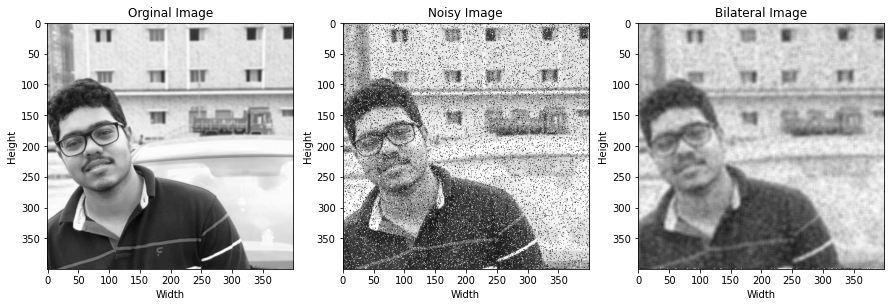

In [167]:
print(f'Type of the given bilateral image is {type(bilateral_iamge)}')
print(f'Size of given bilateral image is {bilateral_iamge.shape}')
print(f'Height of given bilateral image is {bilateral_iamge.shape[0]}')
print(f'Width of given bilateral image is {bilateral_iamge.shape[1]}')
print(f'Diemension of the given bilateral image is {bilateral_iamge.ndim}')
print(f'PSNR value for bilateral image is: {psnr(noisy_img,bilateral_iamge)} dB')

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))

# to plot the image
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
axes[0].set_title('Orginal Image')
axes[0].imshow(grayImg,cmap='gray')

# to plot the noisy image
axes[1].set_xlabel("Width")
axes[1].set_ylabel("Height")
axes[1].set_title("Noisy Image")
axes[1].imshow(noisy_img,cmap='gray') 

# to plot the Bilateral image
axes[2].set_xlabel('Width')
axes[2].set_ylabel('Height')
axes[2].set_title('Bilateral Image')
axes[2].imshow(bilateral_iamge,cmap='gray')

-------------------------------
#                  **The End**
-------------------------------